## Meta - 

This file show to divide/ slice an image into a grid of desired size

## Author - Rahul Suresh

In [1]:
#divide image into grid of desired size

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
img = Image.open( 'cropped.jpg' )
img.load()
data = np.asarray( img, dtype="int32" )

Text(0.5, 1.0, 'Input Image')

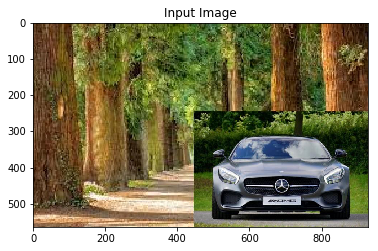

In [4]:
plt.imshow(data)
plt.title("Input Image")

In [5]:
orig_height, orig_width, orig_channels=data.shape
data.shape

(565, 929, 3)

In [6]:
#slice "data" into grids of side "grid"
def slice(data,grid):
    height, width, channels=data.shape
    h2=height//grid
    w2=width//grid
    data3=[]
    sum_row=0
    for i in range(0,grid):
        sum_column=0
        for j in range(0,grid):
            data_temp=data[sum_row:sum_row+h2,sum_column:sum_column+w2]
            data3.append(data_temp)
            sum_column+=w2
        sum_row+=h2
    return np.array(data3)

In [7]:
grid=5
data2=slice(data,grid)

In [8]:
data2.shape

(25, 113, 185, 3)

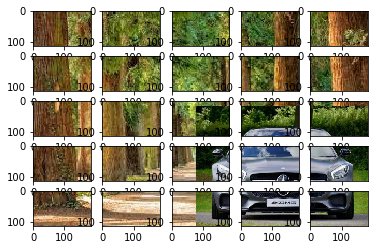

In [12]:
for i in range(1, grid*grid+1):
    plt.subplot(grid, grid, i)
    plt.imshow(data2[i-1])
plt.savefig('sliced.jpg')

In [10]:
#stich "data" -> grids of side "grid"
def stich(data,grid):
    data_whole = np.zeros(shape=(orig_height, orig_width, orig_channels),dtype='int32')
    h2=orig_height//grid
    w2=orig_width//grid
    sum_row=0
    for i in range(0,grid):
        sum_column=0
        for j in range(0,grid):
            data_whole[sum_row:sum_row+h2,sum_column:sum_column+w2]=data[i*grid+j]
            sum_column+=w2
        sum_row+=h2
    return data_whole

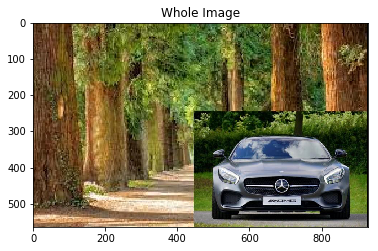

In [11]:
data_whole=stich(data2,grid)
plt.imshow(data_whole)
plt.title("Whole Image")
plt.savefig('output.jpg')